In [1]:
!pip install 'ms-swift[all]' -U

Looking in indexes: https://mirrors.cloud.aliyuncs.com/pypi/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 MB 83.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.0/316.0 kB 5.7 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 MB 70.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.6/325.6 kB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.4/462.4 kB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 128.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.2 MB/s eta 0:00:00
DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.

In [3]:
#打开网址 https://cdn-media.huggingface.co/frpc-gradio-0.3/frpc_linux_amd64 下载后上传
!pwd
# 1. 强制创建目标目录（如果不存在的话）
!mkdir -p /root/.cache/huggingface/gradio/frpc

# 2. 将文件复制过去并改名为带版本号的名称
!cp /mnt/workspace/frpc_linux_amd64 /root/.cache/huggingface/gradio/frpc/frpc_linux_amd64_v0.3

# 3. 赋予可执行权限
!chmod +x /root/.cache/huggingface/gradio/frpc/frpc_linux_amd64_v0.3

# 4. 验证是否成功（如果显示 -rwxr-xr-x 且文件名正确就没问题了）
!ls -l /root/.cache/huggingface/gradio/frpc/frpc_linux_amd64_v0.3

/mnt/workspace
-rwxr-xr-x 1 root root 11907224 12月 19 22:37 /root/.cache/huggingface/gradio/frpc/frpc_linux_amd64_v0.3


In [ ]:
!swift web-ui --lang zh --share

In [ ]:
# 强制使用 CPU
!export CUDA_VISIBLE_DEVICES=""

!swift sft \
    --model Qwen/Qwen3-0.6B \
    --train_type lora \
    --dataset /mnt/workspace/sharegpt_output.jsonl \
    --torch_dtype float32 \
    --num_train_epochs 1 \
    --per_device_train_batch_size 1 \
    --per_device_eval_batch_size 1 \
    --learning_rate 1e-4 \
    --lora_rank 8 \
    --lora_alpha 32 \
    --target_modules all-linear \
    --gradient_accumulation_steps 8 \
    --eval_steps 100 \
    --save_steps 200 \
    --save_total_limit 2 \
    --logging_steps 10 \
    --max_length 2048 \
    --output_dir output-qwen3-0.6b-lora \
    --warmup_ratio 0.05 \
    --dataloader_num_workers 0 \
    --model_author swift \
    --model_name qwen3-0.6b-lora


In [9]:
!swift export \
  --model Qwen/Qwen3-0.6B \
  --dataset /mnt/workspace/sharegpt_output.jsonl \
  --output_dir /mnt/workspace/cached_dataset_qwen3 \
  --to_cached_dataset true \
  --max_length 4096 \
  --dataset_num_proc 4


run sh: `/usr/local/bin/python /usr/local/lib/python3.11/site-packages/swift/cli/export.py --model Qwen/Qwen3-0.6B --dataset /mnt/workspace/sharegpt_output.jsonl --output_dir /mnt/workspace/cached_dataset_qwen3 --to_cached_dataset true --max_length 4096 --dataset_num_proc 4`
[INFO:swift] Successfully registered `/usr/local/lib/python3.11/site-packages/swift/llm/dataset/data/dataset_info.json`.
[INFO:swift] rank: -1, local_rank: -1, world_size: 1, local_world_size: 1
[INFO:swift] Downloading the model from ModelScope Hub, model_id: Qwen/Qwen3-0.6B
[INFO:modelscope] Target directory already exists, skipping creation.
[INFO:swift] Loading the model using model_dir: /mnt/workspace/.cache/modelscope/models/Qwen/Qwen3-0___6B
[INFO:swift] Setting torch_dtype: torch.bfloat16
[INFO:swift] Setting args.lazy_tokenize: False
[INFO:swift] args.output_dir: `/mnt/workspace/cached_dataset_qwen3`
[INFO:swift] Global seed set to 42
[INFO:swift] args: ExportArguments(use_ray=False, ray_exp_name=None, dev

样本总数: 345
最大长度: 4016
平均长度: 2112.36
中位数: 1600.0
50% 样本长度小于: 1600.0
60% 样本长度小于: 2504.8
70% 样本长度小于: 2869.2
80% 样本长度小于: 3181.8
90% 样本长度小于: 3585.8
95% 样本长度小于: 3765.8
99% 样本长度小于: 3954.92


/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26679 (\N{CJK UNIFIED IDEOGRAPH-6837}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from font(s) DejaVu Sans.
  fig.canvas

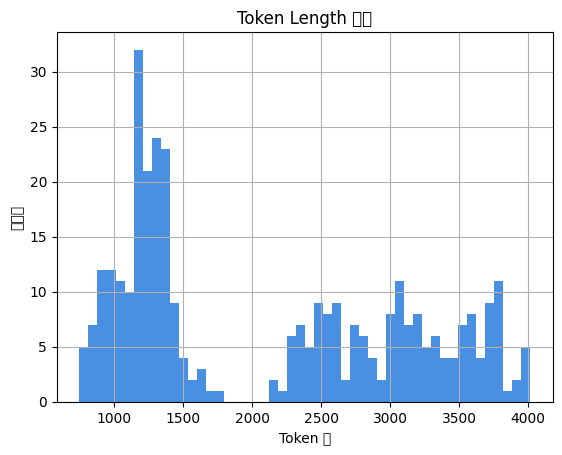

In [14]:
from datasets import load_from_disk
import numpy as np
import matplotlib.pyplot as plt

# 正确路径是 train 子目录
ds = load_from_disk("/mnt/workspace/cached_dataset_qwen3/train")
lengths = ds["length"]

# 统计信息
print(f"样本总数: {len(lengths)}")
print(f"最大长度: {max(lengths)}")
print(f"平均长度: {np.mean(lengths):.2f}")
print(f"中位数: {np.median(lengths)}")
print(f"50% 样本长度小于: {np.percentile(lengths, 50)}")
print(f"60% 样本长度小于: {np.percentile(lengths, 60)}")
print(f"70% 样本长度小于: {np.percentile(lengths, 70)}")
print(f"80% 样本长度小于: {np.percentile(lengths, 80)}")
print(f"90% 样本长度小于: {np.percentile(lengths, 90)}")
print(f"95% 样本长度小于: {np.percentile(lengths, 95)}")
print(f"99% 样本长度小于: {np.percentile(lengths, 99)}")

# 可视化
plt.hist(lengths, bins=50, color="#4A90E2")
plt.title("Token Length 分布")
plt.xlabel("Token 数")
plt.ylabel("样本数")
plt.grid(True)
plt.show()


In [18]:
!pip install psutil GPUtil #GPU检测

Looking in indexes: https://mirrors.cloud.aliyuncs.com/pypi/simple
  Preparing metadata (setup.py) ... done
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7393 sha256=c55680e4a70fad5365abe0d733647aa5447546c4999a7e6c82ddbf315d286cad
  Stored in directory: /root/.cache/pip/wheels/38/10/48/9e6a32b7769ff0e65223d9bf4dea0fe1ad940fdf17b0c0cc03
Successfully built GPUtil
DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.3.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [32]:
import os
import psutil

# 自动检测核心数
logical = psutil.cpu_count(logical=True)
physical = psutil.cpu_count(logical=False)

print(f"检测到逻辑核心数: {logical}, 物理核心数: {physical}")

# 设置环境变量（对当前 Python 进程和子进程都生效）
os.environ["OMP_NUM_THREADS"] = str(physical)
os.environ["MKL_NUM_THREADS"] = str(physical)
os.environ["PYTORCH_NUM_THREADS"] = str(physical)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

# ✅ 启动 swift sft（示例）
!swift sft \
  --model Qwen/Qwen3-0.6B \
  --train_type lora \
  --dataset /mnt/workspace/sharegpt_output.jsonl#50 \
  --torch_dtype float32 \
  --num_train_epochs 1 \
  --per_device_train_batch_size 1 \
  --gradient_accumulation_steps 1 \
  --learning_rate 5e-4 \
  --lora_rank 8 \
  --lora_alpha 32 \
  --target_modules all-linear \
  --eval_steps 5 \
  --save_steps 10 \
  --logging_steps 1 \
  --max_length 2048 \
  --output_dir /mnt/workspace/output-cpu-qwen3 \
  --warmup_ratio 0.05 \
  --dataloader_num_workers 16 \
  --dataset_num_proc 16 \
  --model_author swift \
  --model_name cpu-test-run \
  --report_to none


检测到逻辑核心数: 64, 物理核心数: 32
run sh: `/usr/local/bin/python /usr/local/lib/python3.11/site-packages/swift/cli/sft.py --model Qwen/Qwen3-0.6B --train_type lora --dataset /mnt/workspace/sharegpt_output.jsonl#50 --torch_dtype float32 --num_train_epochs 1 --per_device_train_batch_size 1 --gradient_accumulation_steps 1 --learning_rate 5e-4 --lora_rank 8 --lora_alpha 32 --target_modules all-linear --eval_steps 5 --save_steps 10 --logging_steps 1 --max_length 2048 --output_dir /mnt/workspace/output-cpu-qwen3 --warmup_ratio 0.05 --dataloader_num_workers 16 --dataset_num_proc 16 --model_author swift --model_name cpu-test-run --report_to none`
[INFO:swift] Successfully registered `/usr/local/lib/python3.11/site-packages/swift/llm/dataset/data/dataset_info.json`.
[INFO:swift] rank: -1, local_rank: -1, world_size: 1, local_world_size: 1
[INFO:swift] Downloading the model from ModelScope Hub, model_id: Qwen/Qwen3-0.6B
[INFO:modelscope] Target directory already exists, skipping creation.
[INFO:swift] Loa

In [ ]:
import multiprocessing
import time
import psutil
import GPUtil
import os
from IPython.display import clear_output

def monitor(interval=10):
    pid = os.getpid()
    process = psutil.Process(pid)

    try:
        while True:
            clear_output(wait=True)

            usage = psutil.cpu_percent(percpu=True)
            total = psutil.cpu_percent()
            mem = psutil.virtual_memory()
            proc_cpu = process.cpu_percent()
            proc_mem = process.memory_info().rss // (1024**2)
            proc_threads = process.num_threads()

            try:
                gpus = GPUtil.getGPUs()
            except Exception:
                gpus = []

            lines = []
            lines.append(f"当前进程 PID: {pid}")
            lines.append("每核 CPU 利用率：")
            for i, u in enumerate(usage):
                bar = "[" + "█" * int(u / 3.3) + "-" * (30 - int(u / 3.3)) + f"] {u:5.1f}%"
                lines.append(f"  核心 {i}: {bar}")
            lines.append(f"\n总 CPU 利用率: {total:.1f}%")
            lines.append(f"内存占用: {mem.percent:.1f}%  |  已用: {mem.used // (1024**2)} MB / {mem.total // (1024**2)} MB")
            lines.append(f"当前进程线程数: {proc_threads}  |  CPU 占用: {proc_cpu:.1f}%  |  内存占用: {proc_mem} MB")

            if gpus:
                lines.append("\nGPU 状态：")
                for gpu in gpus:
                    lines.append(f"  GPU {gpu.id} - {gpu.name}")
                    lines.append(f"    显存: {gpu.memoryUsed}MB / {gpu.memoryTotal}MB ({gpu.memoryUtil*100:.1f}%)")
                    lines.append(f"    利用率: {gpu.load*100:.1f}%  |  温度: {gpu.temperature}°C")

            print("\n".join(lines))
            time.sleep(interval)

    except KeyboardInterrupt:
        print("✅ 已停止监控")

# ✅ 启动监控为后台进程
monitor_proc = multiprocessing.Process(target=monitor, args=(10,))
monitor_proc.start()


In [31]:
#修复使用cpu时，检测出gpu训练仍然因为 torch.cpu 没有 max_memory_reserved 而报错，这说明 Swift 
# 的某个内部回调逻辑仍然在尝试调用 GPU 专属接口，即使你已经关闭了日志上报。
# 临时 patch Swift 的 callback.py（推荐）
!pip show ms-swift
import os

target_file = "/usr/local/lib/python3.11/site-packages/swift/trainers/callback.py"

with open(target_file, "r") as f:
    lines = f.readlines()

# 找到函数定义行
start = None
for i, line in enumerate(lines):
    if "def get_max_reserved_memory()" in line:
        start = i
        break

if start is not None:
    # 替换整个函数体
    lines[start:start+5] = [
        "def get_max_reserved_memory():\n",
        "    try:\n",
        "        import torch\n",
        "        if torch.cuda.is_available():\n",
        "            devices = list(range(torch.cuda.device_count()))\n",
        "            mems = [torch.cuda.max_memory_reserved(device=device) for device in devices]\n",
        "            return max(mems) if mems else 0\n",
        "        else:\n",
        "            return 0\n",
        "    except Exception:\n",
        "        return 0\n"
    ]

    with open(target_file, "w") as f:
        f.writelines(lines)

    print("✅ callback.py 已成功 patch，兼容 CPU-only 模式")
else:
    print("❌ 未找到 get_max_reserved_memory 函数，未修改")


Name: ms_swift
Version: 3.11.1
Summary: Swift: Scalable lightWeight Infrastructure for Fine-Tuning
Home-page: https://github.com/modelscope/swift
Author: DAMO ModelScope teams
Author-email: contact@modelscope.cn
License: Apache License 2.0
Location: /usr/local/lib/python3.11/site-packages
Requires: accelerate, addict, aiohttp, attrdict, binpacking, charset-normalizer, cpm-kernels, dacite, datasets, einops, fastapi, gradio, importlib-metadata, jieba, json-repair, matplotlib, modelscope, nltk, numpy, omegaconf, openai, oss2, pandas, peft, pillow, PyYAML, requests, rouge, safetensors, scipy, sentencepiece, simplejson, sortedcontainers, tensorboard, tiktoken, tqdm, transformers, transformers-stream-generator, trl, uvicorn, zstandard
Required-by: 
✅ callback.py 已成功 patch，兼容 CPU-only 模式


In [47]:
import json
import random

data_path = "/mnt/workspace/sharegpt_output.jsonl"

with open(data_path, "r") as f:
    lines = f.readlines()

# 随机抽一条含有 messages 的样本
while True:
    sample = json.loads(random.choice(lines))
    if "messages" in sample:
        break

# 构造 prompt
prompt = ""
for msg in sample["messages"]:
    role = "用户" if msg["role"] == "user" else "助手"
    prompt += f"{role}：{msg['content'].strip()}\n"
prompt += "助手："

print("✅ 随机抽取的 prompt：\n")
print(prompt)


✅ 随机抽取的 prompt：

助手：你是一名地产地图直播领域的专家，长期服务于用户购房决策，擅长根据给定的【背景资料】回答用户提出的问题：
- 从用户的问题和背景资料识别购房者真实意图与隐性焦虑
- 提炼这类购房人群的共性问题
- 根据背景资料用专业但不说教的方式给出能改变认知层级的答案
你的目标不是简单“答题”，而是帮助一类购房用户意识到认知盲区、规避决策风险，并引导其进一步咨询。
用户：市场对小面积老破小的需求在锐减，这对世博板块房价有何影响

【背景资料】浦东世博板块房价腰斩，原因分析如下：

1. 区位优势明显，但老破小房价下跌：世博板块拥有滨江外围CAZ、央企总部林立、地铁密布等区位优势，但板块内的老破小房价却下跌严重。

2. 老破小同质化严重，竞争激烈：世博板块老破小数量众多，同质化严重，存在互相压价现象，加剧了跌幅。

3. 购买力不支持：世博老破小在浦东的认可度不高，购买力倾向于浦西内环核心地段。

4. 老破小结构性遇冷：上海老破小供应增多，购买群体减少，助推了世博老破小跌幅。

5. 缺乏稀缺价值支撑：世博老破小没有拆迁、XQ等稀缺价值支撑，抗跌性差。

6. 旧改力度小：浦东老破小品质不高，在一定程度上助推了跌幅。

7. 市场对老破小的选择更趋谨慎：市场对小面积老破小的需求在锐减。

8. 世博老破小跌幅较大，性价比高：对于刚需自住来说，世博老破小具有一定的吸引力。

9. 城市更新推进，居住品质提升：世博板块正在进行城市更新，居住品质和产品结构得到改善。

10. 世博板块居住价值逐渐显现：随着城市更新、交通能级提升和人口结构优化，世博板块的居住价值越来越明显。

综上，世博老破小房价下跌是多方面因素造成的，但市场对其的关注度逐渐提高，对于追求性价比和通勤效率的刚需人群来说，世博老破小具有一定的投资价值。
助手：<think>
在回答这个问题前，我首先分析了提问者的潜在背景和深层担忧。从问题聚焦“需求锐减对房价影响”来看，提问者可能处于首次买房或改善阶段的购房者，尤其关注市场波动带来的风险。这类用户表面上问的是数据影响，但真正担心的是“买错板块”——比如被世博的区位优势（如滨江CAZ、地铁便利）误导，而忽略了老破小的流通性风险和长期贬值可能。他们容易陷入决策误区：只看到价格下跌的“机会”，却没意识到同质化竞争和缺乏稀缺价值的陷阱，最终

In [56]:
import subprocess

prompt = """你是一名地产地图直播领域的专家，长期服务于用户购房决策，擅长根据给定的【背景资料】回答用户提出的问题：
- 从用户的问题和背景资料识别购房者真实意图与隐性焦虑
- 提炼这类购房人群的共性问题
- 根据背景资料用专业但不说教的方式给出能改变认知层级的答案
你的目标不是简单“答题”，而是帮助一类购房用户意识到认知盲区、规避决策风险，并引导其进一步咨询。
用户：市场对小面积老破小的需求在锐减，这对世博板块房价有何影响

【背景资料】浦东世博板块房价腰斩，原因分析如下：

1. 区位优势明显，但老破小房价下跌：世博板块拥有滨江外围CAZ、央企总部林立、地铁密布等区位优势，但板块内的老破小房价却下跌严重。

2. 老破小同质化严重，竞争激烈：世博板块老破小数量众多，同质化严重，存在互相压价现象，加剧了跌幅。

3. 购买力不支持：世博老破小在浦东的认可度不高，购买力倾向于浦西内环核心地段。

4. 老破小结构性遇冷：上海老破小供应增多，购买群体减少，助推了世博老破小跌幅。

5. 缺乏稀缺价值支撑：世博老破小没有拆迁、XQ等稀缺价值支撑，抗跌性差。

6. 旧改力度小：浦东老破小品质不高，在一定程度上助推了跌幅。

7. 市场对老破小的选择更趋谨慎：市场对小面积老破小的需求在锐减。

8. 世博老破小跌幅较大，性价比高：对于刚需自住来说，世博老破小具有一定的吸引力。

9. 城市更新推进，居住品质提升：世博板块正在进行城市更新，居住品质和产品结构得到改善。

10. 世博板块居住价值逐渐显现：随着城市更新、交通能级提升和人口结构优化，世博板块的居住价值越来越明显。

综上，世博老破小房价下跌是多方面因素造成的，但市场对其的关注度逐渐提高，对于追求性价比和通勤效率的刚需人群来说，世博老破小具有一定的投资价值。
"""

cmd = [
    "swift", "infer",
    "--model", "Qwen/Qwen3-0.6B",
    "--adapters", "/mnt/workspace/output-cpu-qwen3/v4-20251219-235806/checkpoint-25",
    "--stream", "true",
    "--temperature", "0.7",
    "--prompt", "你是谁",
    "--max_new_tokens", "512",
]

subprocess.run(cmd, input=prompt.encode("utf-8"))


run sh: `/usr/local/bin/python /usr/local/lib/python3.11/site-packages/swift/cli/infer.py --model Qwen/Qwen3-0.6B --adapters /mnt/workspace/output-cpu-qwen3/v4-20251219-235806/checkpoint-25 --stream true --temperature 0.7 --prompt 你是谁 --max_new_tokens 512`


[INFO:swift] Successfully registered `/usr/local/lib/python3.11/site-packages/swift/llm/dataset/data/dataset_info.json`.
[INFO:swift] Successfully loaded /mnt/workspace/output-cpu-qwen3/v4-20251219-235806/checkpoint-25/args.json.
[INFO:swift] rank: -1, local_rank: -1, world_size: 1, local_world_size: 1
[INFO:swift] Downloading the model from ModelScope Hub, model_id: Qwen/Qwen3-0.6B


[INFO:modelscope] Target directory already exists, skipping creation.
[INFO:swift] Loading the model using model_dir: /mnt/workspace/.cache/modelscope/models/Qwen/Qwen3-0___6B
[INFO:swift] Setting args.eval_human: True
[INFO:swift] Setting args.lazy_tokenize: False
[INFO:swift] args.result_path: /mnt/workspace/output-cpu-qwen3/v4-20251219-235806/checkpoint-25/infer_result/20251220-004011.jsonl
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/swift/cli/infer.py", line 5, in <module>
    infer_main()
  File "/usr/local/lib/python3.11/site-packages/swift/llm/infer/infer.py", line 309, in infer_main
    return SwiftInfer(args).main()
           ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/swift/llm/infer/infer.py", line 25, in __init__
    super().__init__(args)
  File "/usr/local/lib/python3.11/site-packages/swift/llm/base.py", line 19, in __init__
    self.args = self._parse_args(args)
                ^^^^^^^^^^^^^^^^^^^^^^
  File "/u

CompletedProcess(args=['swift', 'infer', '--model', 'Qwen/Qwen3-0.6B', '--adapters', '/mnt/workspace/output-cpu-qwen3/v4-20251219-235806/checkpoint-25', '--stream', 'true', '--temperature', '0.7', '--prompt', '你是谁', '--max_new_tokens', '512'], returncode=1)

In [55]:
!swift infer \
    --adapters output/vx-xxx/checkpoint-xxx \
    --stream true \
    --temperature 0 \
    --max_new_tokens 2048 \


run sh: `/usr/local/bin/python /usr/local/lib/python3.11/site-packages/swift/cli/infer.py --adapters output/vx-xxx/checkpoint-xxx --stream true --temperature 0 --max_new_tokens 2048 \`
[INFO:swift] Successfully registered `/usr/local/lib/python3.11/site-packages/swift/llm/dataset/data/dataset_info.json`.
[INFO:swift] Downloading the model from ModelScope Hub, model_id: output/vx-xxx/checkpoint-xxx
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/site-packages/swift/cli/infer.py", line 5, in <module>
    infer_main()
  File "/usr/local/lib/python3.11/site-packages/swift/llm/infer/infer.py", line 309, in infer_main
    return SwiftInfer(args).main()
           ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/site-packages/swift/llm/infer/infer.py", line 25, in __init__
    super().__init__(args)
  File "/usr/local/lib/python3.11/site-packages/swift/llm/base.py", line 19, in __init__
    self.args = self._parse_args(args)
                ^^^^^^^^^^^^^^^^^^^^^^
  File